## The `Palette` class

The `Palette` class defines a *list of colors* in the Flexoki system. Each `Palette` only has a single attribute:

- `colors`: A list of `Color` objects that populate the `Palette`.

In [10]:
# Importing the kernel
from flexoki import Flexoki
# Accessing a palette of all the reds
p = Flexoki.palettes.reds
p

Several additional functions exist to make accessing the attributes of the `Color` objects easy:

- `names()` returns the names of each color.

- `hex()`, `rgb()`, and `rgba()` returns the relevant attribute of each color. If called without an options, will return a simple list; however, if `names=True` is included, will return a *dictionary*, with the keys being the names of the colors, and the values the relevant attribute.

In [11]:
print(f"names: {p.names()}")
print(f"hex (no names): {p.hex()}")
print(f"rgb (no names): {p.rgb()}")
print(f"rgba (with names): {p.rgba(names=True)}")

names: ['red-950', 'red-900', 'red-850', 'red-800', 'red-700', 'red-600', 'red-500', 'red-400', 'red-300', 'red-200', 'red-150', 'red-100', 'red-50']
hex (no names): ['#261312', '#3E1715', '#551B18', '#6C201C', '#942822', '#AF3029', '#C03E35', '#D14D41', '#E8705F', '#F89A8A', '#FDB2A2', '#FFCABB', '#FFE1D5']
rgb (no names): [(38, 19, 18), (62, 23, 21), (85, 27, 24), (108, 32, 28), (148, 40, 34), (175, 48, 41), (192, 62, 53), (209, 77, 65), (232, 112, 95), (248, 154, 138), (253, 178, 162), (255, 202, 187), (255, 225, 213)]
rgba (with names): {'red-950': (38, 19, 18, 1), 'red-900': (62, 23, 21, 1), 'red-850': (85, 27, 24, 1), 'red-800': (108, 32, 28, 1), 'red-700': (148, 40, 34, 1), 'red-600': (175, 48, 41, 1), 'red-500': (192, 62, 53, 1), 'red-400': (209, 77, 65, 1), 'red-300': (232, 112, 95, 1), 'red-200': (248, 154, 138, 1), 'red-150': (253, 178, 162, 1), 'red-100': (255, 202, 187, 1), 'red-50': (255, 225, 213, 1)}


TWo final functions can manipulate the `Palette` object itself:

- `reverse()` reverses the order of the `Colors` in the `Palette`. By default this has the variable `copy` set to `True`, which will return a copy of the Palette instead of affecting the Palette itself; set `copy=False` if you want to override this behavior.

- `to_colormap()` returns a `matplotlib`-compatible Colormap object comprised of the component colors; see the `matplotlib` documentation in this package for more details.

In [12]:
print(f"names (normal): {p.names()}")
_ = p.reverse()
print(f"names (reversed): {p.names()}")

names (normal): ['red-950', 'red-900', 'red-850', 'red-800', 'red-700', 'red-600', 'red-500', 'red-400', 'red-300', 'red-200', 'red-150', 'red-100', 'red-50']
names (reversed): ['red-50', 'red-100', 'red-150', 'red-200', 'red-300', 'red-400', 'red-500', 'red-600', 'red-700', 'red-800', 'red-850', 'red-900', 'red-950']


## `FlexokiSchema.palettes`

As shown in the example above, palettes are primarily accessed via the `palettes` subclass of the `FlexokiSchema` object (usually imported as `Flexoki`).

Unlike colors, palettes may only be accessed as an *attribute* of the subclass - i.e., not via dictionary-style recall, as these palettes do not have "names" in the same way as colors. This may be changed in the future if there is sufficient demand!

The default palettes accessible via the `palettes` subclass are named intuitively, and come in two types: monochromatic (all a single hue, with different levels of lightness) or "monolightness" (all hues, with the same level of lightness).

In [13]:
from flexoki import Flexoki
# Monochromatic
Flexoki.palettes.reds # all reds, at every level of lightness light to dark
Flexoki.palettes.cyans # all cyans, at every level of lightness light to dark
# Monolightness - always of the form l## or l###
Flexoki.palettes.l50 # all hues with a lightness level of 50
Flexoki.palettes.l150 # all hues with a lightness level of 150
Flexoki.palettes.l800 # all hues with a lightness level of 800

Of note is that several aliases are available for "grey-scale" palettes, spanning from paper (lightness of 0) to black (lightness of 1000)

In [14]:
# All of these are equivalent
Flexoki.palettes.base
Flexoki.palettes.blacks
Flexoki.palettes.whites
Flexoki.palettes.grays
Flexoki.palettes.greys

Each palette is shown below:

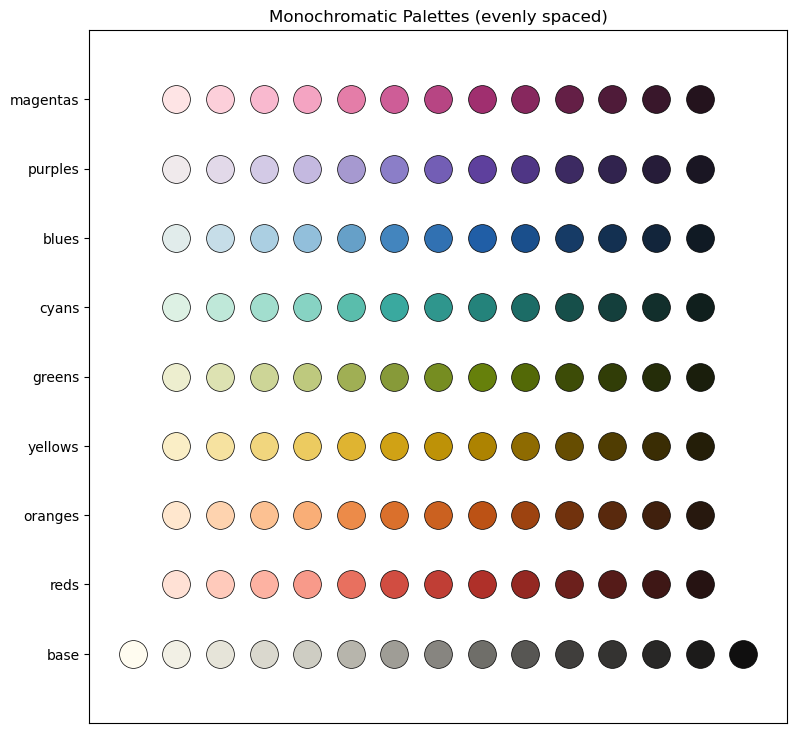

In [15]:
# Monochromatic palettes (each row is a Palette, read left to right - note the base palette has 2 extra colors, paper and black)
import matplotlib.pyplot

palettes = [Flexoki.palettes.base, Flexoki.palettes.reds, Flexoki.palettes.oranges, 
            Flexoki.palettes.yellows, Flexoki.palettes.greens, Flexoki.palettes.cyans, 
            Flexoki.palettes.blues, Flexoki.palettes.purples, Flexoki.palettes.magentas]
names = ["base","reds","oranges","yellows","greens","cyans","blues","purples","magentas"]

fig, ax = matplotlib.pyplot.subplots(1,1, figsize=(9,9))
ax.set_xlim(0,16)
ax.set_ylim(0,10)
ax.set_yticks(range(1,10))
ax.set_yticklabels(names)
ax.set_xticks([])
ax.set_title("Monochromatic Palettes (evenly spaced)")

for y,p,n in zip(range(1,10), palettes, names):
    for x,c in enumerate(p.colors):
        if n!="base":
            ax.plot(x+2,y, marker="o", markerfacecolor=c.hex, markeredgecolor="black", markersize=20, markeredgewidth=0.5)
        else:
            ax.plot(x+1,y, marker="o", markerfacecolor=c.hex, markeredgecolor="black", markersize=20, markeredgewidth=0.5)

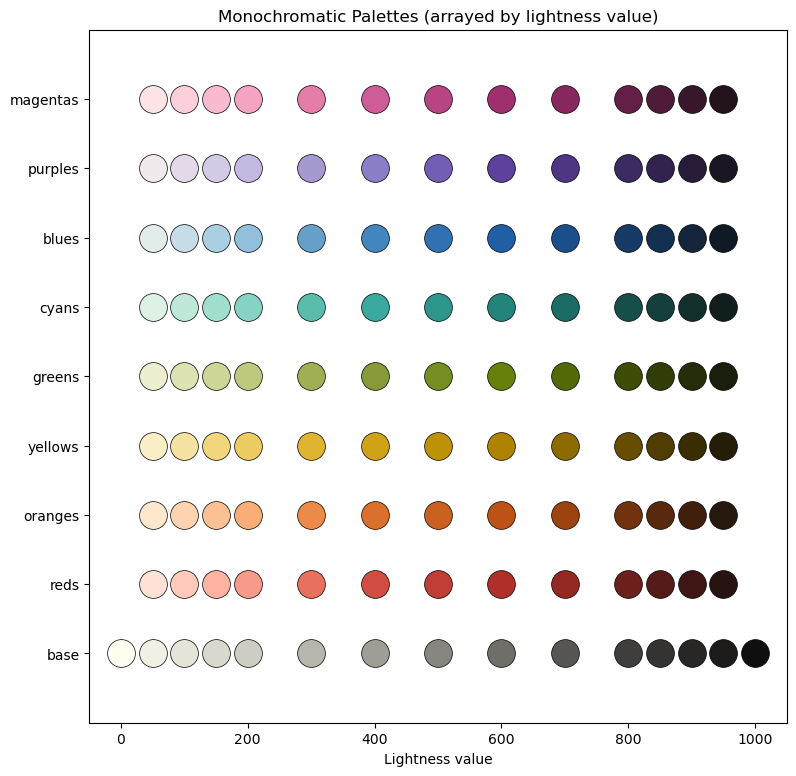

In [16]:
# Monochromatic palettes (each row is a Palette, read left to right - note the uneven spacing due to "missing" lightness values)
palettes = [Flexoki.palettes.base, Flexoki.palettes.reds, Flexoki.palettes.oranges, 
            Flexoki.palettes.yellows, Flexoki.palettes.greens, Flexoki.palettes.cyans, 
            Flexoki.palettes.blues, Flexoki.palettes.purples, Flexoki.palettes.magentas]
names = ["base","reds","oranges","yellows","greens","cyans","blues","purples","magentas"]

fig, ax = matplotlib.pyplot.subplots(1,1, figsize=(9,9))
ax.set_xlim(-50,1050)
ax.set_ylim(0,10)
ax.set_yticks(range(1,10))
ax.set_yticklabels(names)
ax.set_xlabel("Lightness value")
ax.set_title("Monochromatic Palettes (arrayed by lightness value)")

for y,p,n in zip(range(1,10), palettes, names):
    for c in p.colors:
        if n!="base":
            ax.plot(c.l,y, marker="o", markerfacecolor=c.hex, markeredgecolor="black", markersize=20, markeredgewidth=0.5)
        else:
            ax.plot(c.l,y, marker="o", markerfacecolor=c.hex, markeredgecolor="black", markersize=20, markeredgewidth=0.5)

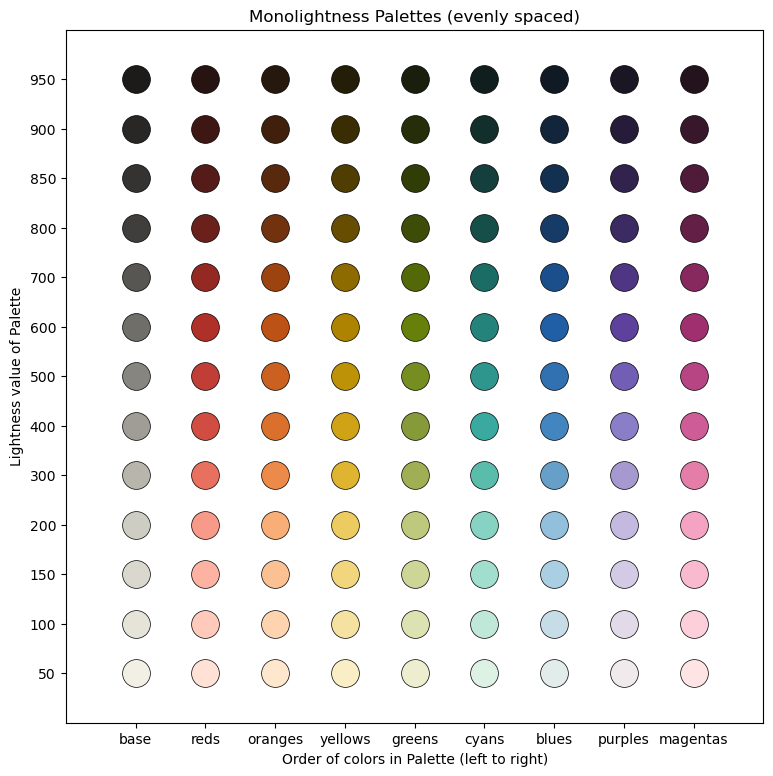

In [ ]:
# Monolightness palettes (each row is a Palette, read left to right)
palettes = [Flexoki.palettes.l50, Flexoki.palettes.l100, Flexoki.palettes.l150, 
            Flexoki.palettes.l200, Flexoki.palettes.l300, Flexoki.palettes.l400, 
            Flexoki.palettes.l500, Flexoki.palettes.l600, Flexoki.palettes.l700, 
            Flexoki.palettes.l800, Flexoki.palettes.l850, Flexoki.palettes.l900, Flexoki.palettes.l950]
names = ["50","100","150","200","300","400","500","600","700","800","850","900","950"]
colors = ["base","reds","oranges","yellows","greens","cyans","blues","purples","magentas"]

fig, ax = matplotlib.pyplot.subplots(1,1, figsize=(9,9))
ax.set_xlim(0,10)
ax.set_ylim(0,14)
ax.set_yticks(range(1,14))
ax.set_yticklabels(names)
ax.set_xticks(range(1,10))
ax.set_xticklabels(colors)
ax.set_title("Monolightness Palettes (evenly spaced)")
ax.set_xlabel("Order of colors in Palette (left to right)")
ax.set_ylabel("Lightness value of Palette")

for y,p,n in zip(range(1,14), palettes, names):
    for x,c in enumerate(p.colors):
        ax.plot(x+1,y, marker="o", markerfacecolor=c.hex, markeredgecolor="black", markersize=20, markeredgewidth=0.5)